# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 18/03/2024        

Grupo 1 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Mario Antonio Guerra Morales 21008
- Kristopher Javier Alvarado Lopez 21188
- David Jonathan Aragon Vasquez 21053

## Proyecto 1
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*owid-co2-data.csv*". A continuación se muestran los resultados: 

In [165]:
import pandas as pd
from typing import *
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import warnings
from tqdm import tqdm
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
import random
import sklearn
import pyclustertend
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [166]:
dataframe: pd.DataFrame = pd.read_csv("owid-co2-data.csv",  encoding='ISO-8859-1')
infoSumary = dataframe.info() #Mostrar información del tipo de variables utilizadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   39717 non-null  object 
 3   population                                 39495 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            25136 non-null  float64
 10  co2_including_luc     

In [167]:
dataframe.columns #Se muestran las columnas del dataframe.

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [168]:
dataframe.describe() #Se describen las características principales de las variables cuantitativas del dataframe.
unique_countries = dataframe['country'].unique()

# Escribir los resultados en un archivo de texto
with open('unique_countries.txt', 'w') as file:
    for country in unique_countries:
        file.write(country + '\n')


In [169]:

# Suponiendo que 'df' es tu DataFrame y 'lista_exclusion' es tu lista de datos a excluir
lista_exclusion = [
    'Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)',
    'Central America (GCP)', 'Europe', 'Europe (GCP)', 'Europe (excl. EU-27)',
    'Europe (excl. EU-28)', 'European Union (27)', 'European Union (28)',
    'International aviation', 'International shipping', 'International transport',
    'High-income countries', 'Low-income countries', 'Middle East (GCP)',
    'Non-OECD (GCP)', 'North America', 'North America (GCP)', 'North America (excl. USA)',
    'OECD (GCP)', 'OECD (Jones et al. 2023)', 'Oceania', 'Oceania (GCP)',
    'Panama Canal Zone (GCP)', 'Panama Canal Zone (Jones et al. 2023)',
    'Upper-middle-income countries', 'South America', 'South America (GCP)'
]

# Excluir las filas que coinciden con los datos de la lista de exclusión
dataframeOC = dataframe[~dataframe['country'].isin(lista_exclusion)]
# Seleccionar solo las columnas numéricas en el DataFrame

#Original
numeric_columns = dataframe.select_dtypes(include='number').columns
# Aplicar la conversión a media solo a las columnas numéricas
df = dataframe[numeric_columns] = dataframe[numeric_columns].fillna(dataframe[numeric_columns].mean())

num_nan = df.isna().sum().sum()
print("Número total de NaN en el DataFrame:", num_nan)


#DataOC
numeric_columnsOC = dataframeOC.select_dtypes(include='number').columns
# Aplicar la conversión a media solo a las columnas numéricas
dfOC = dataframeOC[numeric_columns] = dataframeOC[numeric_columns].fillna(dataframeOC[numeric_columns].mean())

num_nanOC = dfOC.isna().sum().sum()
print("Número total de NaN en el DataFrame:", num_nanOC)


Número total de NaN en el DataFrame: 0
Número total de NaN en el DataFrame: 0


In [170]:
column_summary = dataframeOC['co2'].describe()
column_summary

count    41685.000000
mean       150.344807
std       1033.021631
min          0.000000
25%          1.166000
50%         59.936000
75%        150.344807
max      37149.785000
Name: co2, dtype: float64

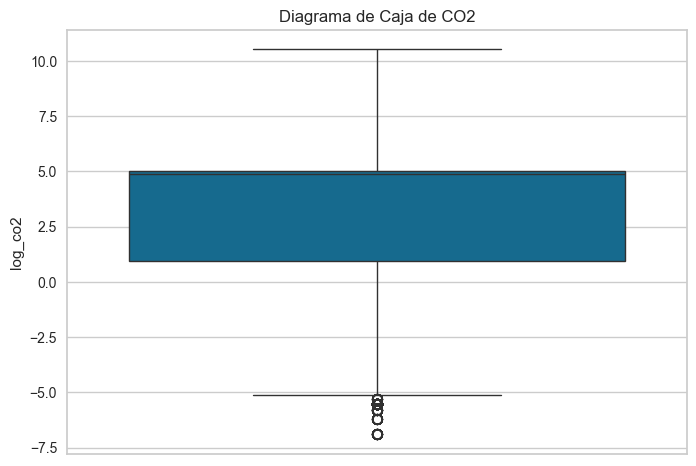

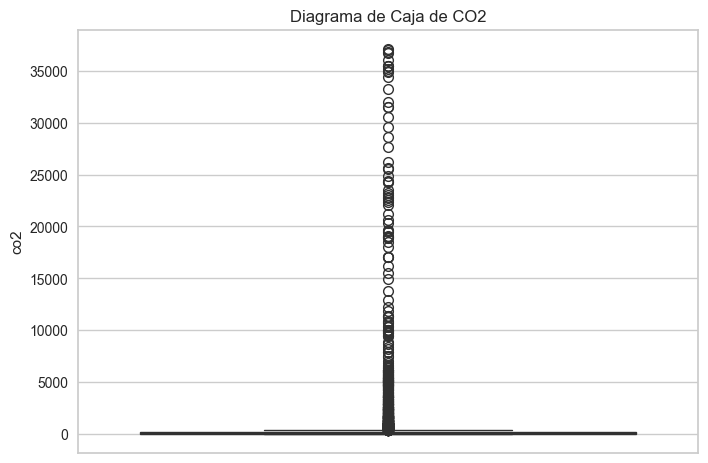

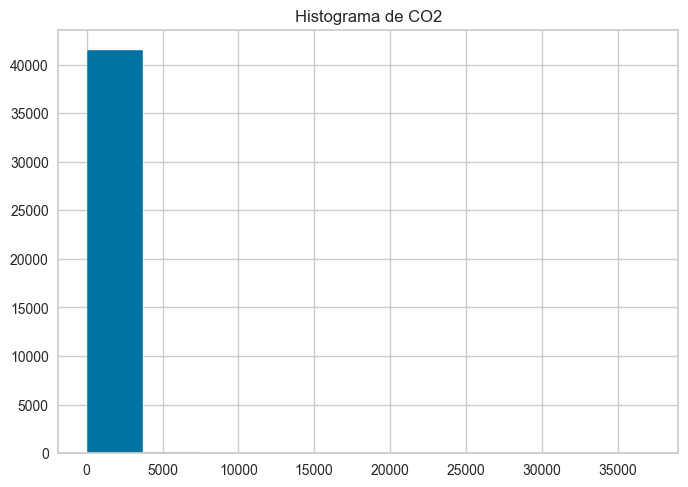

In [171]:
#Gráficos exploratorios del CO2.

import seaborn as sns
import matplotlib.pyplot as plt

for column in numeric_columnsOC:
    dataframeOC['log_' + column] = np.log(dataframeOC[column])

sns.boxplot(data=dataframeOC['log_co2'])
plt.title("Diagrama de Caja de CO2")
plt.show()

sns.boxplot(data=dataframeOC['co2'])
plt.title("Diagrama de Caja de CO2")
plt.show()

dataframeOC['co2'].hist()
plt.title("Histograma de CO2")
plt.show()

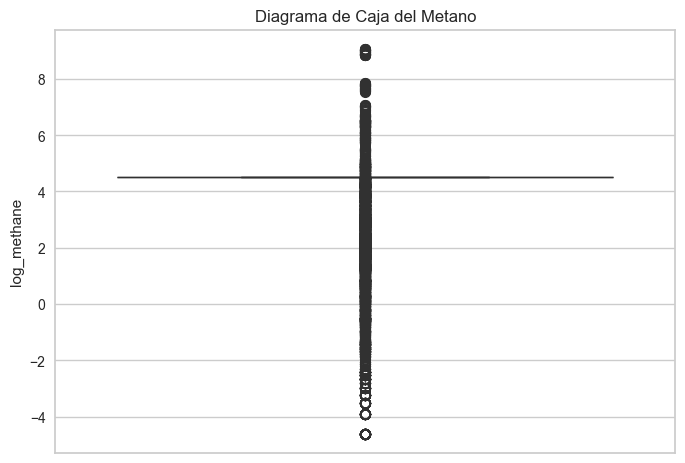

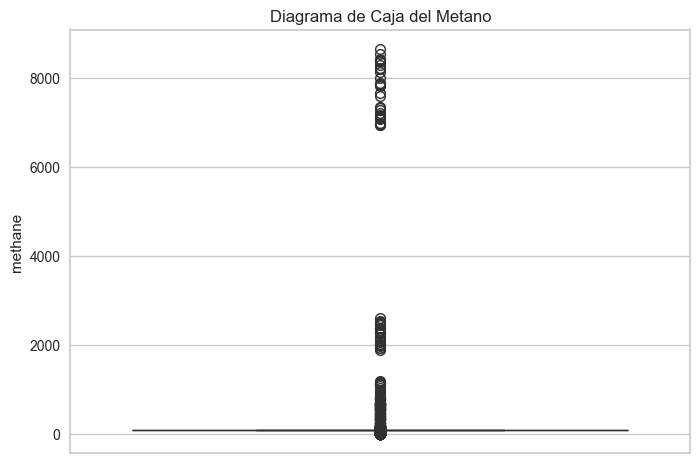

count    41685.000000
mean        89.742832
std        220.460067
min          0.000000
25%         89.742832
50%         89.742832
75%         89.742832
max       8654.750000
Name: methane, dtype: float64

In [172]:
#Gráficos exploratorios del Metano.

sns.boxplot(data=dataframeOC['log_methane'])
plt.title("Diagrama de Caja del Metano")
plt.show()
sns.boxplot(data=dataframeOC['methane'])
plt.title("Diagrama de Caja del Metano")
plt.show()

column_summary = dataframeOC['methane'].describe()
column_summary


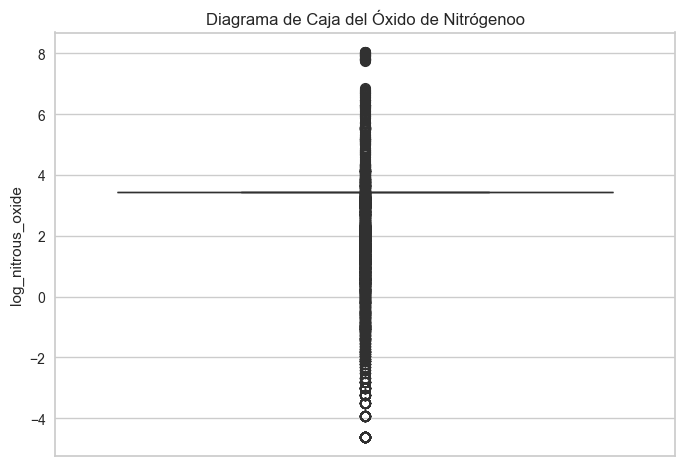

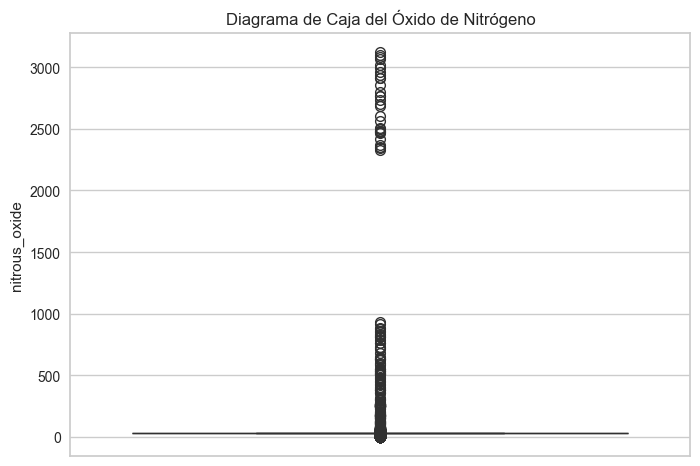

count    41685.000000
mean        31.331825
std         77.583501
min          0.000000
25%         31.331825
50%         31.331825
75%         31.331825
max       3126.700000
Name: nitrous_oxide, dtype: float64

In [173]:
#Gráficos exploratorios del Óxido de Nitrógeno.
sns.boxplot(data=dataframeOC['log_nitrous_oxide'])
plt.title("Diagrama de Caja del Óxido de Nitrógenoo")
plt.show()
sns.boxplot(data=dataframeOC['nitrous_oxide'])
plt.title("Diagrama de Caja del Óxido de Nitrógeno")
plt.show()
column_summary = dataframeOC['nitrous_oxide'].describe()
column_summary

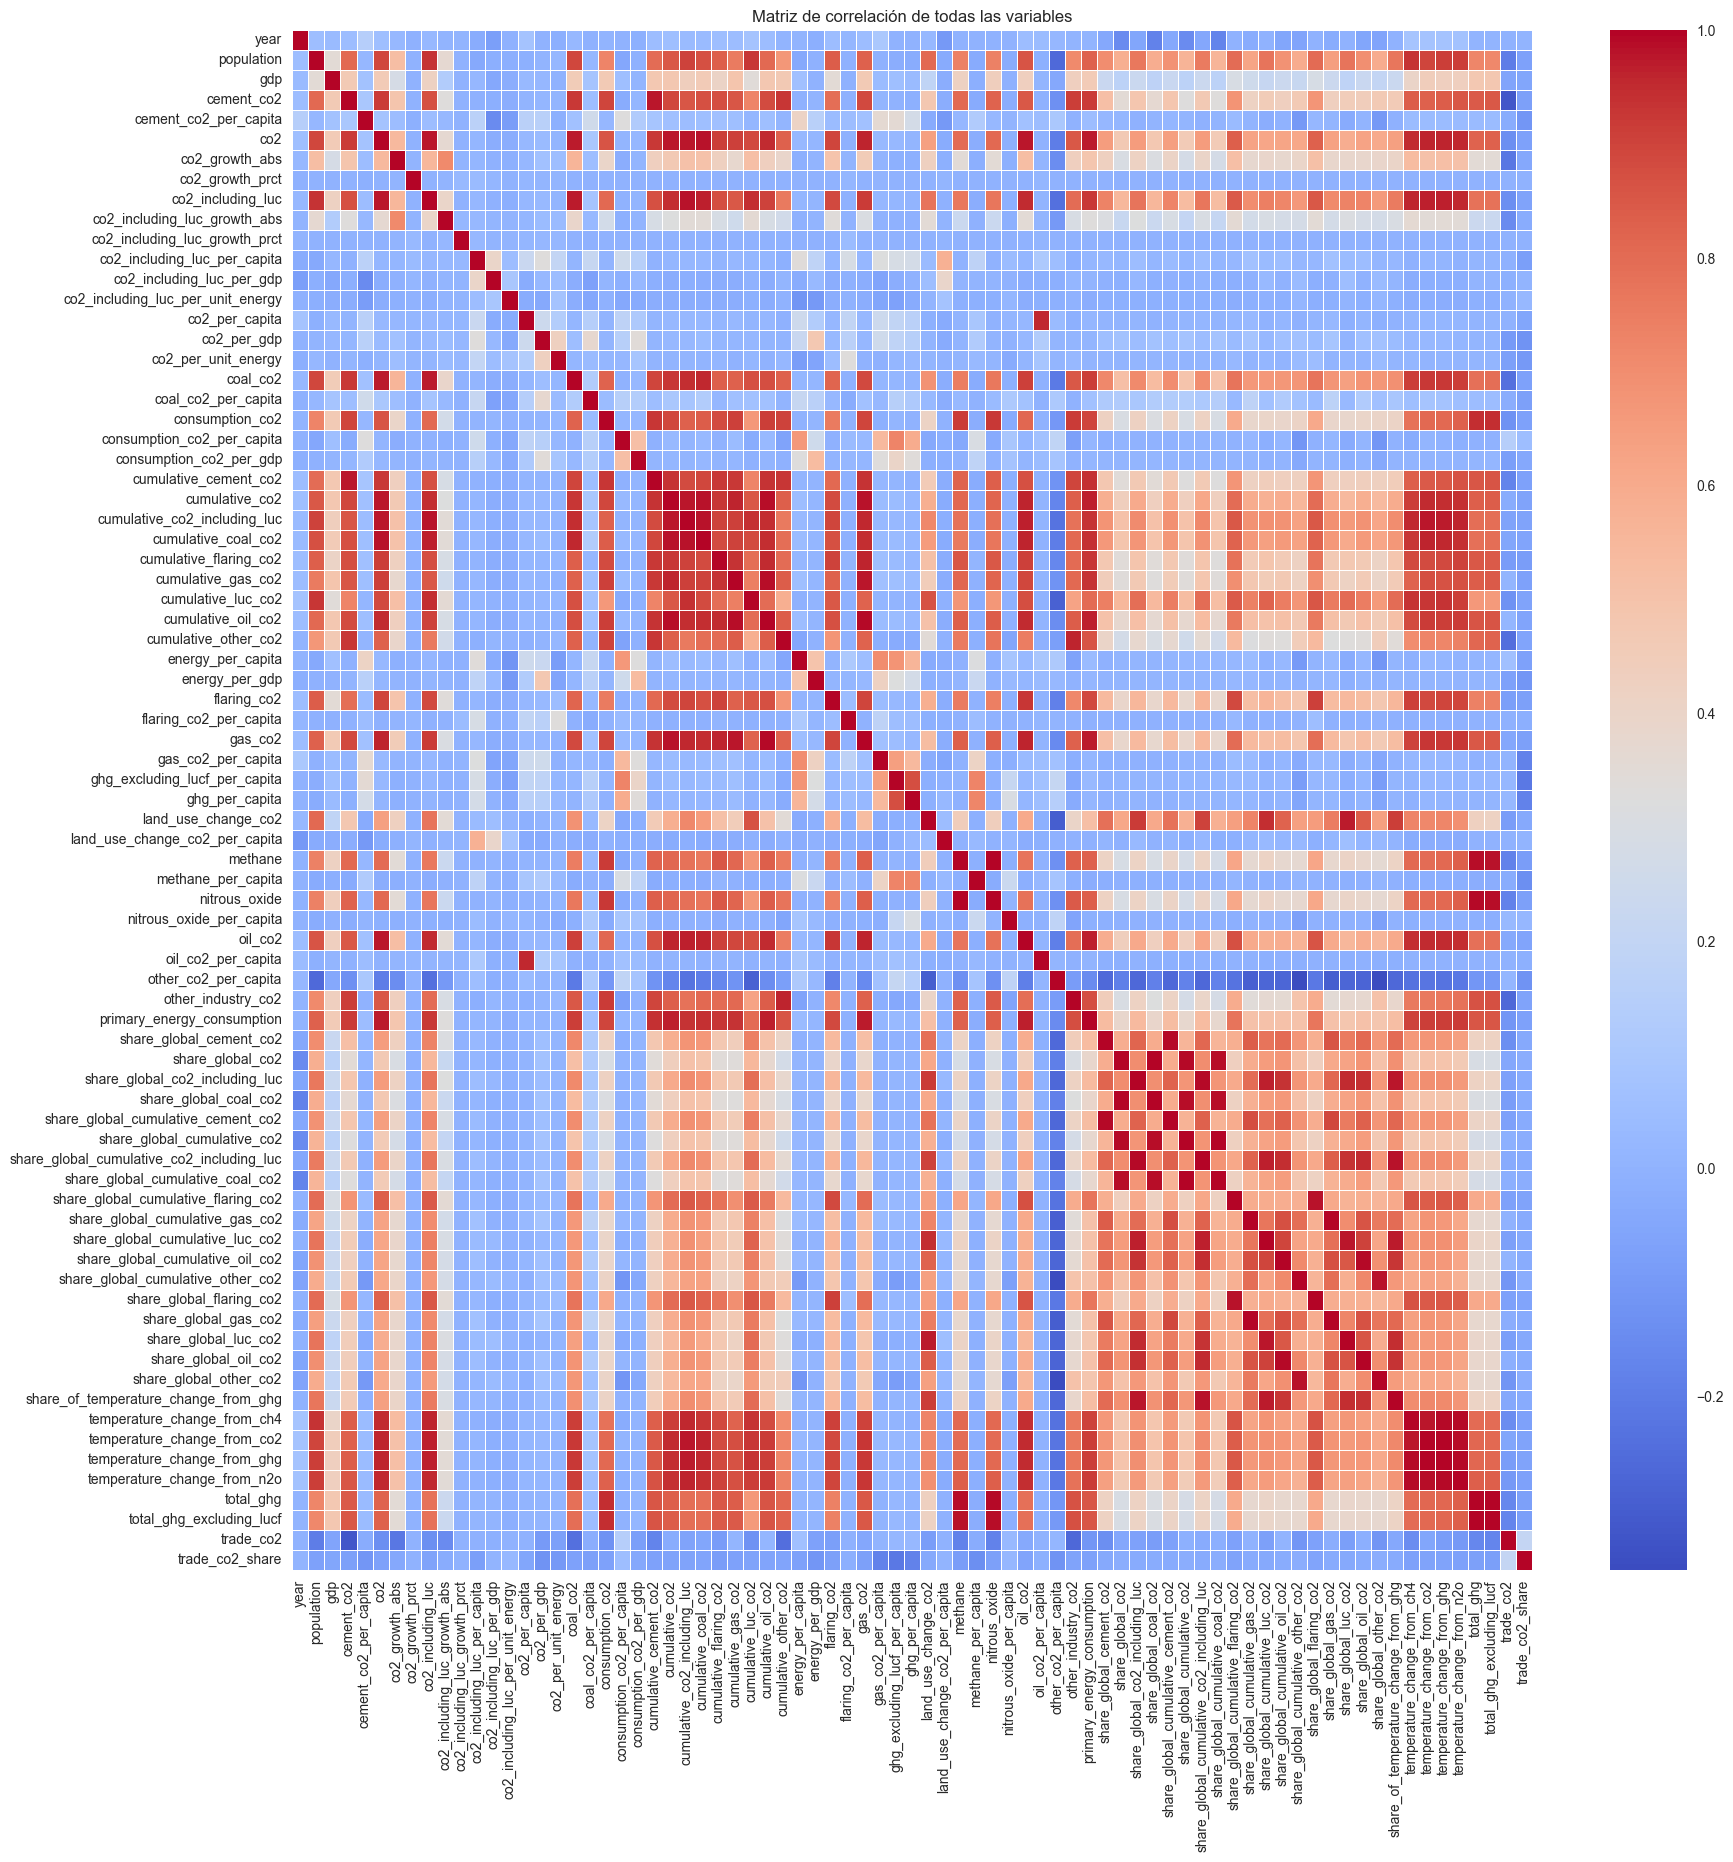

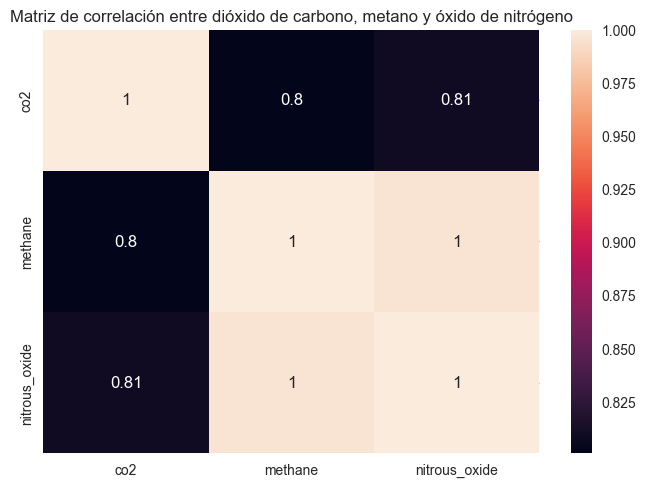

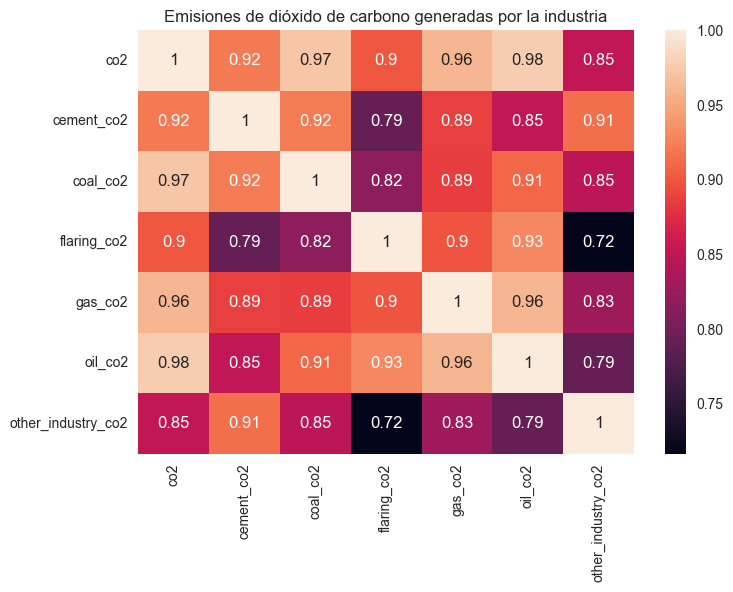

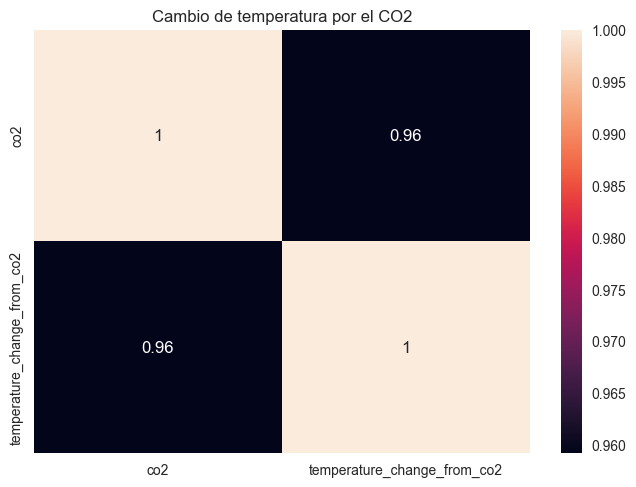

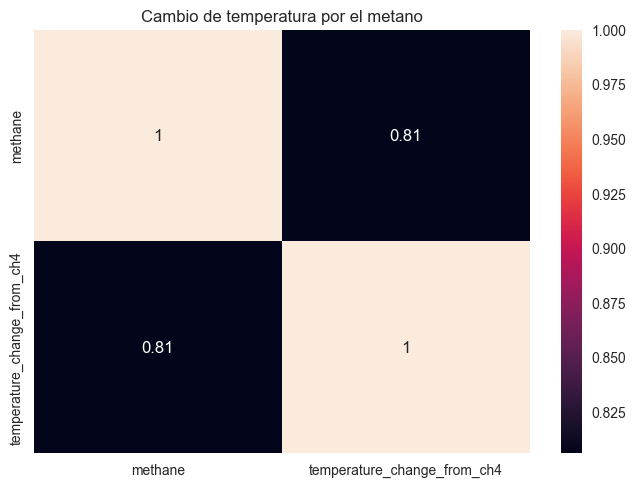

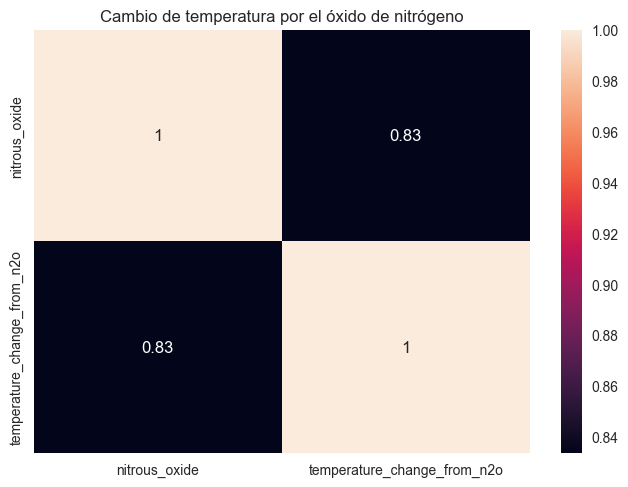

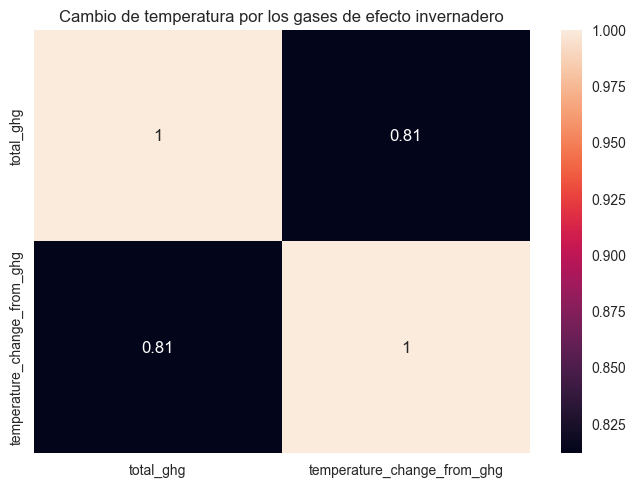

In [174]:
# Análisis de correlaciones.

correlation_matrix = dfOC.corr()
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura según sea necesario
plt.title("Matriz de correlación de todas las variables")
sns.heatmap(correlation_matrix, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Añade anotaciones y especifica el formato
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para una mejor visualización
plt.yticks(rotation=0)  # Rota las etiquetas del eje y para una mejor visualización
plt.show()


ghg_variables = ['co2', 'methane', 'nitrous_oxide']

correlation_ghg = dataframeOC[ghg_variables].corr()
plt.title("Matriz de correlación entre dióxido de carbono, metano y óxido de nitrógeno")
sns.heatmap(correlation_ghg, annot=True)
plt.show()

co2_variables = ['co2', 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2']

correlation_co2 = dataframeOC[co2_variables].corr()
plt.title("Emisiones de dióxido de carbono generadas por la industria")
sns.heatmap(correlation_co2, annot=True)
plt.show()

temperature_variables_co2 = ['co2', 'temperature_change_from_co2']

correlation_tempco2 = dataframeOC[temperature_variables_co2].corr()
plt.title("Cambio de temperatura por el CO2")
sns.heatmap(correlation_tempco2, annot=True)
plt.show()

temperature_variables_ch4 = ['methane', 'temperature_change_from_ch4']

correlation_tempch4 = dataframeOC[temperature_variables_ch4].corr()
plt.title("Cambio de temperatura por el metano")
sns.heatmap(correlation_tempch4, annot=True)
plt.show()

temperature_variables_n2o = ['nitrous_oxide', 'temperature_change_from_n2o']

correlation_tempn2o = dataframeOC[temperature_variables_n2o].corr()
plt.title("Cambio de temperatura por el óxido de nitrógeno")
sns.heatmap(correlation_tempn2o, annot=True)
plt.show()

temperature_variables_ghg = ['total_ghg', 'temperature_change_from_ghg']

correlation_tempghg = dataframeOC[temperature_variables_ghg].corr()
plt.title("Cambio de temperatura por los gases de efecto invernadero")
sns.heatmap(correlation_tempghg, annot=True)
plt.show()



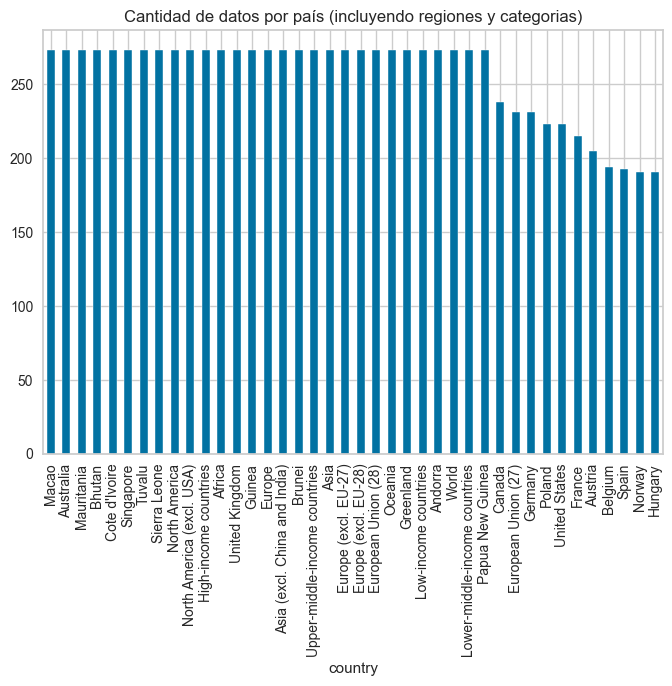

In [175]:
# Estudio de variables categóricas
countries_barplot = dataframe['country'].value_counts()
number_of_bars = 40
limited_countries_barplot = countries_barplot.head(number_of_bars)

limited_countries_barplot.plot(kind='bar')
plt.title('Cantidad de datos por país (incluyendo regiones y categorias)')
plt.show()

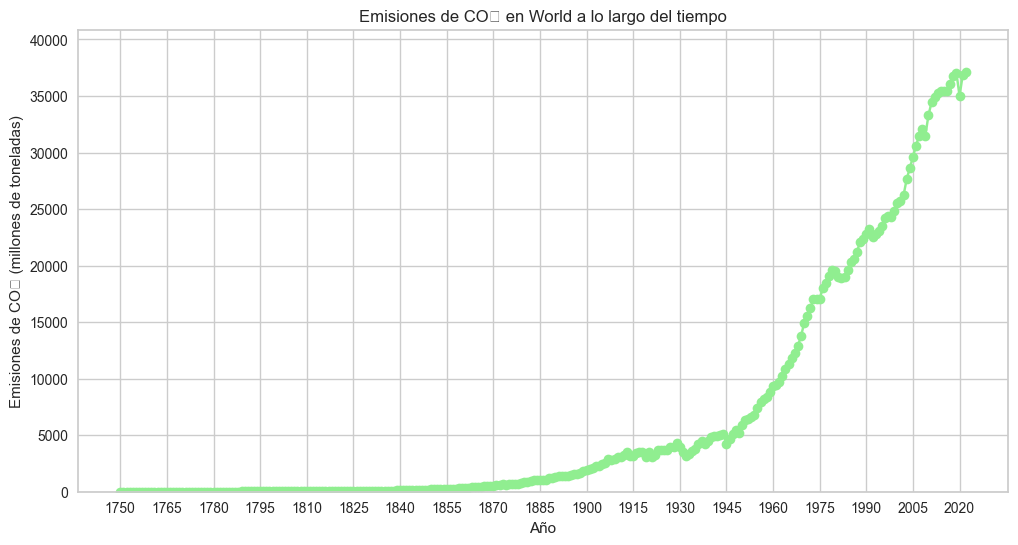

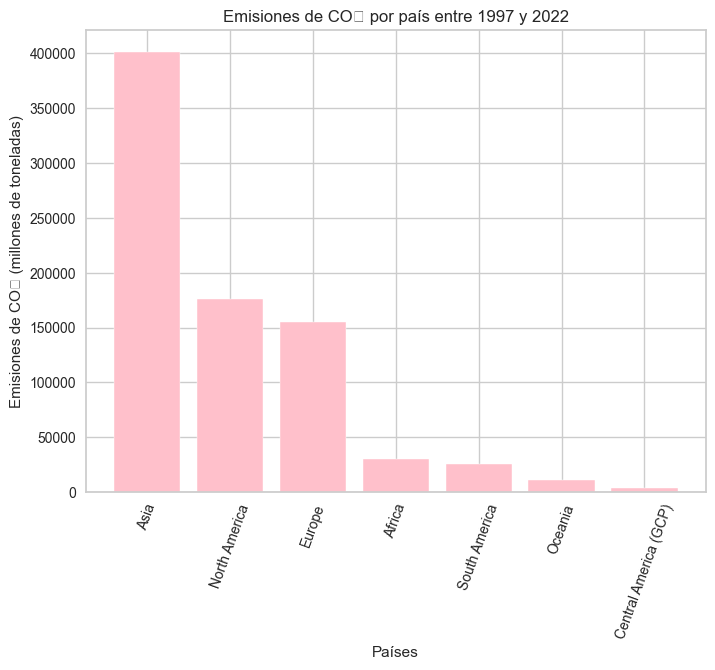

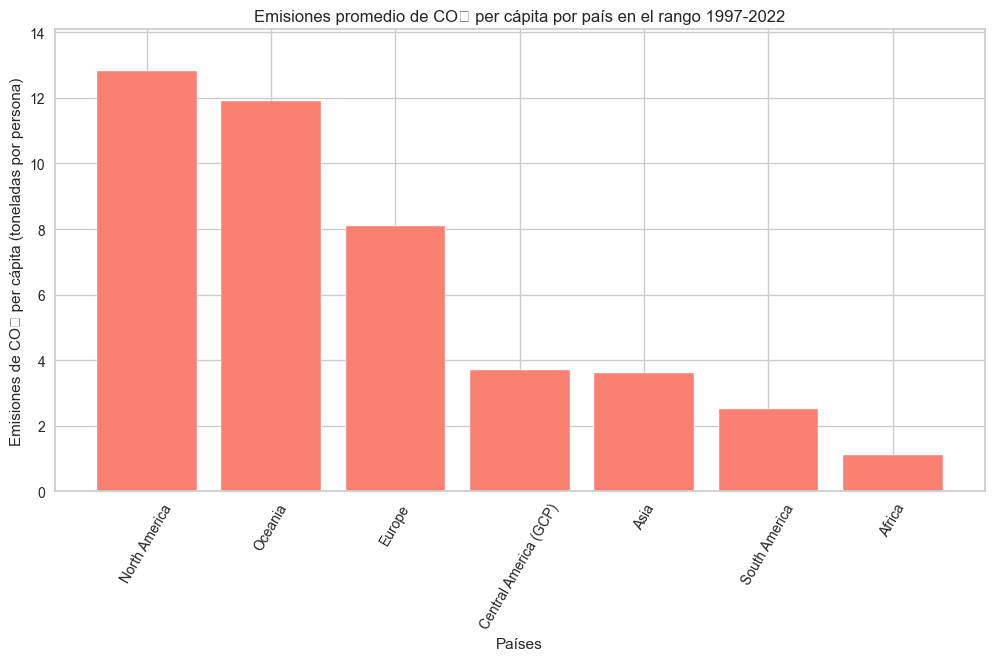

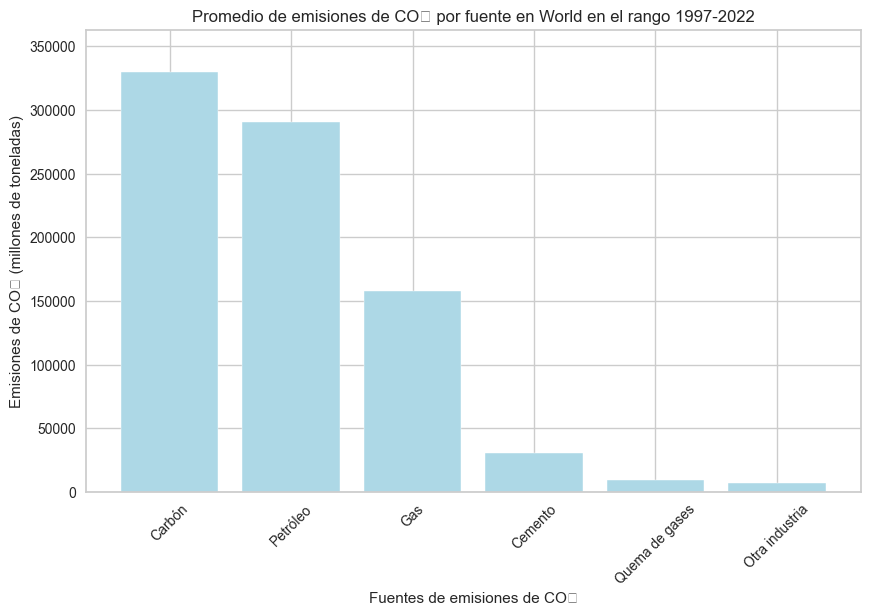

  Magnitud de Reducción  Cantidad de Países
0         Significativa                  65
1              Moderada                  81
2               Pequeña                 218
            Año  Número de datos
0  (1997, 2022]             5715


In [176]:
from tabulate import tabulate

def bar_plot_country_emissions(data, start_year, end_year, continents=[]):
    data_range = data[(data['year'] >= start_year) & (data['year'] <= end_year)]
    data_range = data_range[data_range['country'].isin(continents)]
    total_emissions = data_range.groupby('country')['co2'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8, 6))
    plt.bar(total_emissions.index, total_emissions.values, color='pink')
    plt.xlabel('Países')
    plt.ylabel('Emisiones de CO₂ (millones de toneladas)')
    plt.title(f'Emisiones de CO₂ por país entre {start_year} y {end_year}')
    plt.xticks(rotation=70)
    plt.show()

def line_plot_country_emissions(data, country):
    plt.figure(figsize=(12, 6))
    data_country = data[data['country'] == country]
    total_emissions = data_country.groupby('year')['co2'].sum()
    plt.plot(total_emissions.index, total_emissions.values, label=country, marker='o',  color='lightgreen')

    plt.xlabel('Año')
    plt.ylabel('Emisiones de CO₂ (millones de toneladas)')
    plt.title(f'Emisiones de CO₂ en {country} a lo largo del tiempo')
    plt.grid(True)
    plt.xticks(range(min(data_country['year']), max(data_country['year'])+10, 15))  # Marcas cada 5 años
    plt.ylim(0, max(data_country['co2']) * 1.1)  # Ajustar el límite superior del eje y en un 10% más alto que el valor máximo
    plt.show()

def bar_plot_country_co2_per_capita_range(data, start_year, end_year, continents=[]):
    data_range = data[(data['year'] >= start_year) & (data['year'] <= end_year)]
    data_range = data_range[data_range['country'].isin(continents)]
    mean_co2_per_capita = data_range.groupby('country')['co2_per_capita'].mean().reset_index()

    mean_co2_per_capita = mean_co2_per_capita.sort_values(by='co2_per_capita', ascending=False)
    plt.figure(figsize=(12, 6))
    plt.bar(mean_co2_per_capita['country'], mean_co2_per_capita['co2_per_capita'], color='salmon')
    plt.xlabel('Países')
    plt.ylabel('Emisiones de CO₂ per cápita (toneladas por persona)')
    plt.title(f'Emisiones promedio de CO₂ per cápita por país en el rango {start_year}-{end_year}')
    plt.xticks(rotation=60)
    plt.ylim(0, max(mean_co2_per_capita['co2_per_capita'] * 1.1))
    plt.show()

def bar_plot_country_co2_sources_range(data, start_year, end_year, country):
    data_range = data[(data['country'] == country) & (data['year'] >= start_year) & (data['year'] <= end_year)]
    sum_sources = data_range[['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2', 'other_industry_co2']].sum()

    sum_sources = sum_sources.sort_values(ascending=False)

    source_labels = ['Carbón', 'Petróleo', 'Gas', 'Cemento', 'Quema de gases', 'Otra industria']

    plt.figure(figsize=(10, 6))
    plt.bar(source_labels, sum_sources, color='lightblue')
    plt.xlabel('Fuentes de emisiones de CO₂')
    plt.ylabel('Emisiones de CO₂ (millones de toneladas)')
    plt.title(f'Promedio de emisiones de CO₂ por fuente en {country} en el rango {start_year}-{end_year}')
    plt.xticks(rotation=45)
    plt.ylim(0, max(sum_sources * 1.1))  # Ajustar el límite superior del eje y en un 10% más alto que el valor máximo
    plt.show()


# Tabla de frecuencia de emisiones de CO₂ por rango de años
def frequency_table_emissions(data, year_range):
    bins = pd.cut(data['year'], year_range)
    frequency = bins.value_counts().sort_index()
    frequency_table = pd.DataFrame({'Año': frequency.index, 'Número de datos': frequency.values})
    print(frequency_table)

# Tabla de proporciones: Proporción de países que han reducido sus emisiones de CO2 en un período de tiempo determinado
def reduceEmisions():
    # Definir los rangos de magnitud de reducción
    rangos = [-np.inf, -10, -5, 0]
    etiquetas = ['Significativa', 'Moderada', 'Pequeña']

    # Categorizar los países según la magnitud de la reducción de las emisiones
    dataframeOC['Magnitud Reducción'] = pd.cut(dataframeOC['co2_growth_abs'], bins=rangos, labels=etiquetas)

    # Crear una tabla de frecuencia
    tabla_magnitud = dataframeOC.groupby('Magnitud Reducción')['country'].nunique().reset_index()

    # Renombrar las columnas
    tabla_magnitud.columns = ['Magnitud de Reducción', 'Cantidad de Países']

    # Mostrar la tabla
    print(tabla_magnitud)

    # Utiliza esta función con tu DataFrame 'data'
line_plot_country_emissions(dataframe, 'World')
bar_plot_country_emissions(dataframe, 1997, 2022, continents=['North America', 'Europe', 'Oceania', 'South America', 'Central America (GCP)', 'Asia', 'Africa'])
bar_plot_country_co2_per_capita_range(dataframe, 1997, 2022, continents=['North America', 'Europe', 'Oceania', 'South America', 'Central America (GCP)', 'Asia', 'Africa'])
bar_plot_country_co2_sources_range(dataframe, 1997, 2022, 'World')
reduceEmisions()
frequency_table_emissions(dataframeOC, year_range=[1997, 2022])


In [177]:
# Tabla de frecuencia para la variable 'co2_per_capita'
co2_per_capita_frequency = dataframeOC['co2_per_capita'].value_counts().reset_index().head(15)
co2_per_capita_frequency.columns = ['Annual CO2 Emissions per Capita (tonnes per person)', 'Frequency']
print("Tabla de frecuencia para la variable 'Annual CO2 Emissions per Capita' (primeros 15 elementos):")
print(tabulate(co2_per_capita_frequency.sort_values(by='Frequency', ascending=False), headers='keys', tablefmt='grid'))

# Tabla de frecuencia para la variable 'Population' dividida en intervalos: 
# Divide la población en intervalos específicos (por ejemplo, 0-1M, 1M-10M, etc.) y muestra cuántas observaciones pertenecen a cada intervalo.
population_intervals = pd.cut(dataframeOC['population'], bins=[0, 1000000, 10000000, 100000000, float('inf')], labels=['0-1M', '1M-10M', '10M-100M', '100M+'])
population_frequency = population_intervals.value_counts().reset_index().head(15)
population_frequency.columns = ['Population Interval', 'Frequency']
print("\nTabla de frecuencia para la variable 'Population' dividida en intervalos:")
print(tabulate(population_frequency.sort_values(by='Frequency', ascending=False), headers='keys', tablefmt='grid'))

# Proporción de emisiones de CO2 de cada país respecto al total global para un año dado
# Calcula la proporción de emisiones de CO2 de cada país con respecto al total global de emisiones de CO2. Te permite ver la contribución relativa de cada país a las emisiones globales de CO2.
total_global_co2 = dataframeOC['co2'].sum()
country_co2_proportion = dataframeOC.groupby('country')['co2'].sum() / total_global_co2
country_co2_proportion = country_co2_proportion.reset_index().sort_values(by='co2', ascending=False).head(15)
country_co2_proportion.columns = ['Country', 'CO2 Proportion']
print("\nProporción de emisiones de CO2 de cada país respecto al total global (primeros 15 elementos):")
print(tabulate(country_co2_proportion, headers='keys', tablefmt='grid'))

# Proporción de emisiones de CO2 per cápita respecto a la población total de un país para un año dado
# Calcula la proporción de emisiones de CO2 per cápita de cada país con respecto a la población total del país.
# Esto te muestra las emisiones de CO2 ajustadas por la población de cada país.
country_co2_per_capita_proportion = dataframeOC.groupby('country')['co2'].sum() / dataframeOC.groupby('country')['population'].sum()
country_co2_per_capita_proportion = country_co2_per_capita_proportion.reset_index().sort_values(by=0, ascending=False).head(15)
country_co2_per_capita_proportion.columns = ['Country', 'CO2 per Capita Proportion']
print("\nProporción de emisiones de CO2 per cápita respecto a la población total de un país (primeros 15 elementos):")
print(tabulate(country_co2_per_capita_proportion, headers='keys', tablefmt='grid'))

# Análisis temporal - Media de las emisiones de CO2 por año
# Calcula la media de las emisiones de CO2 para cada año en tu conjunto de datos. Esto te da una idea de la tendencia general de las emisiones de CO2 a lo largo del tiempo.
co2_mean_by_year = dataframeOC.groupby('year')['co2'].mean().reset_index().sort_values(by='year', ascending=False).head(15)
co2_mean_by_year.columns = ['Year', 'Mean CO2 Emissions']
print("\nMedia de las emisiones de CO2 por año (primeros 15 elementos):")
print(tabulate(co2_mean_by_year, headers='keys', tablefmt='grid'))


# Análisis temporal - Tasa de crecimiento anual de las emisiones de CO2
# Esta tabla muestra cómo han cambiado las emisiones de CO2 año tras año en términos de porcentaje.
co2_growth_rate = dataframeOC.groupby('year')['co2'].sum().pct_change().reset_index().sort_values(by='year', ascending=False).head(15)
co2_growth_rate.columns = ['Year', 'CO2 Growth Rate']
print("\nTasa de crecimiento anual de las emisiones de CO2 (primeros 15 elementos):")
print(tabulate(co2_growth_rate, headers='keys', tablefmt='grid'))

Tabla de frecuencia para la variable 'Annual CO2 Emissions per Capita' (primeros 15 elementos):
+----+-------------------------------------------------------+-------------+
|    |   Annual CO2 Emissions per Capita (tonnes per person) |   Frequency |
+====+=======================================================+=============+
|  0 |                                               3.82865 |       18411 |
+----+-------------------------------------------------------+-------------+
|  1 |                                               0       |        1833 |
+----+-------------------------------------------------------+-------------+
|  2 |                                               0.002   |          79 |
+----+-------------------------------------------------------+-------------+
|  3 |                                               0.003   |          76 |
+----+-------------------------------------------------------+-------------+
|  4 |                                               0.00

In [178]:
scaler = sklearn.preprocessing.StandardScaler()
random.seed(123)

dataScale = scaler.fit_transform(dfOC)

# Convierte los datos escalados de nuevo a un DataFrame
scaled_df = pd.DataFrame(dataScale, columns=dfOC.columns)

X = np.array(dfOC)
X.shape

(41685, 77)

In [179]:
pyclustertend.hopkins(X, len(X))

0.0004915800151161084

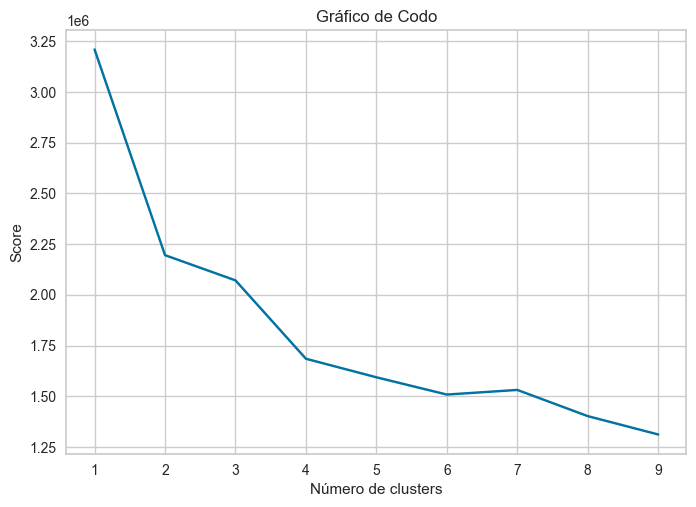

[3209745.000000002, 2195483.5584868393, 2071193.9284547374, 1684769.5931359967, 1593369.4639116963, 1508237.1454948457, 1531074.2300821436, 1401889.4368132185, 1311439.8019539067]


In [180]:
numeroClusters = range(1,10)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(dataScale)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()
print(wcss)

For n_clusters = 2 The average silhouette_score is : 0.9977385201824283
For n_clusters = 3 The average silhouette_score is : 0.9848835063197108
For n_clusters = 4 The average silhouette_score is : 0.9534232648417666
For n_clusters = 5 The average silhouette_score is : 0.9469698489215086
For n_clusters = 6 The average silhouette_score is : 0.9216657018118205


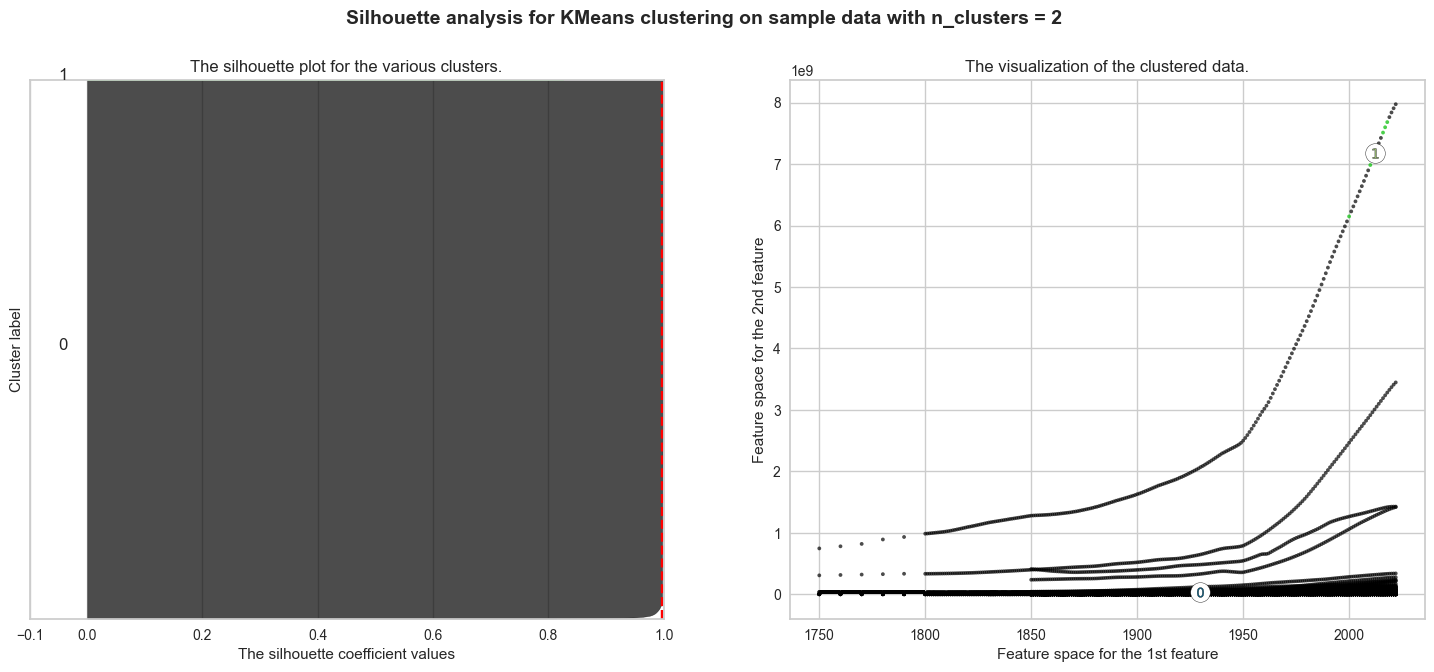

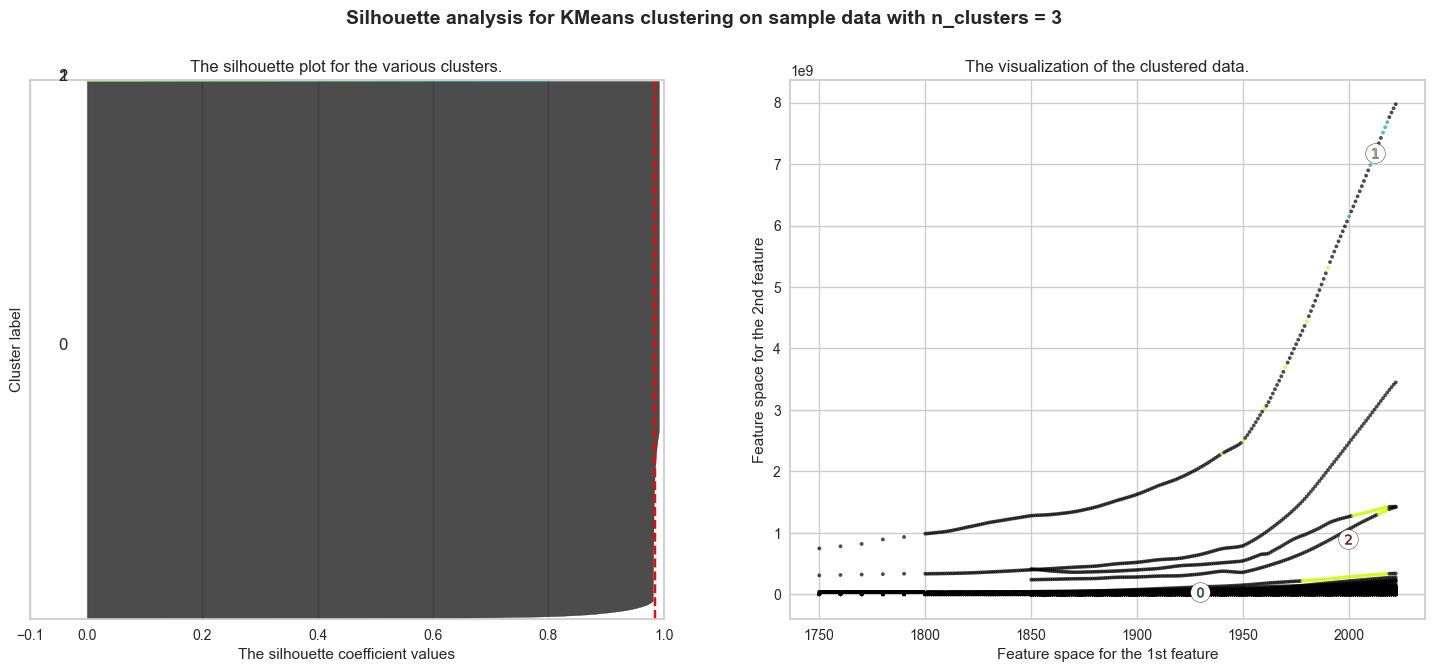

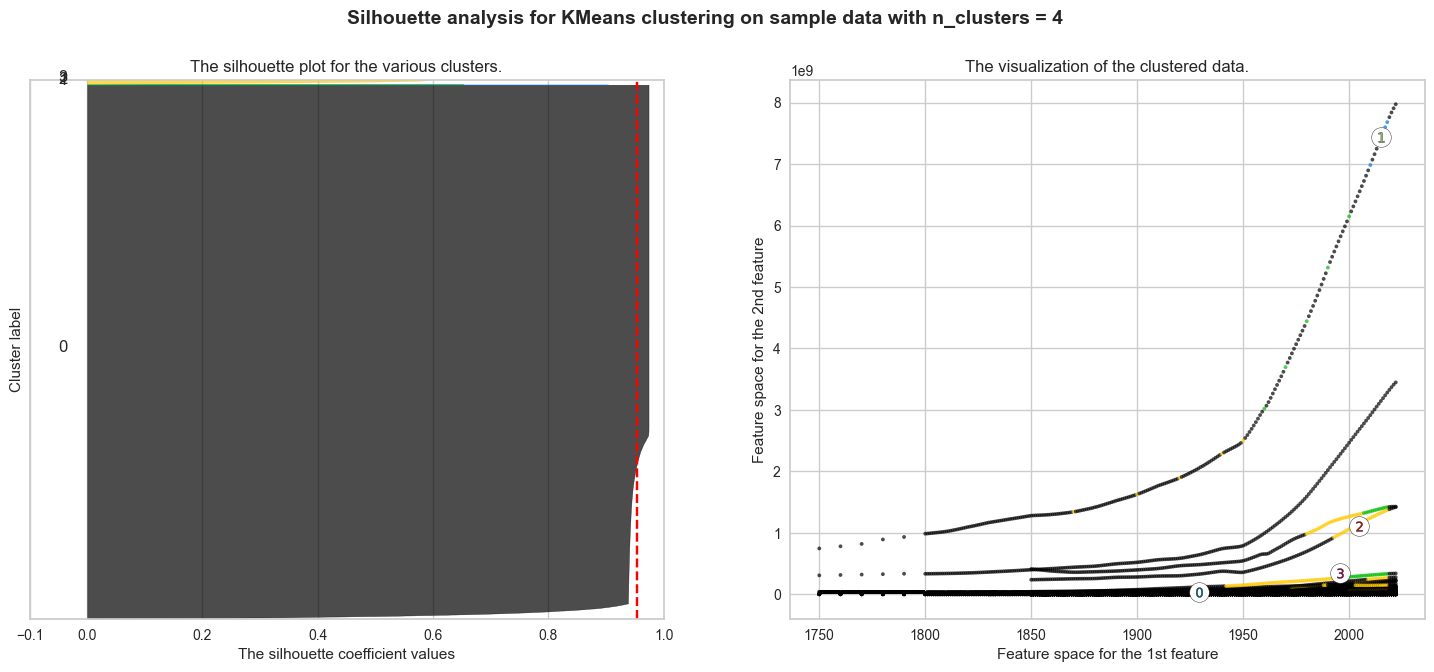

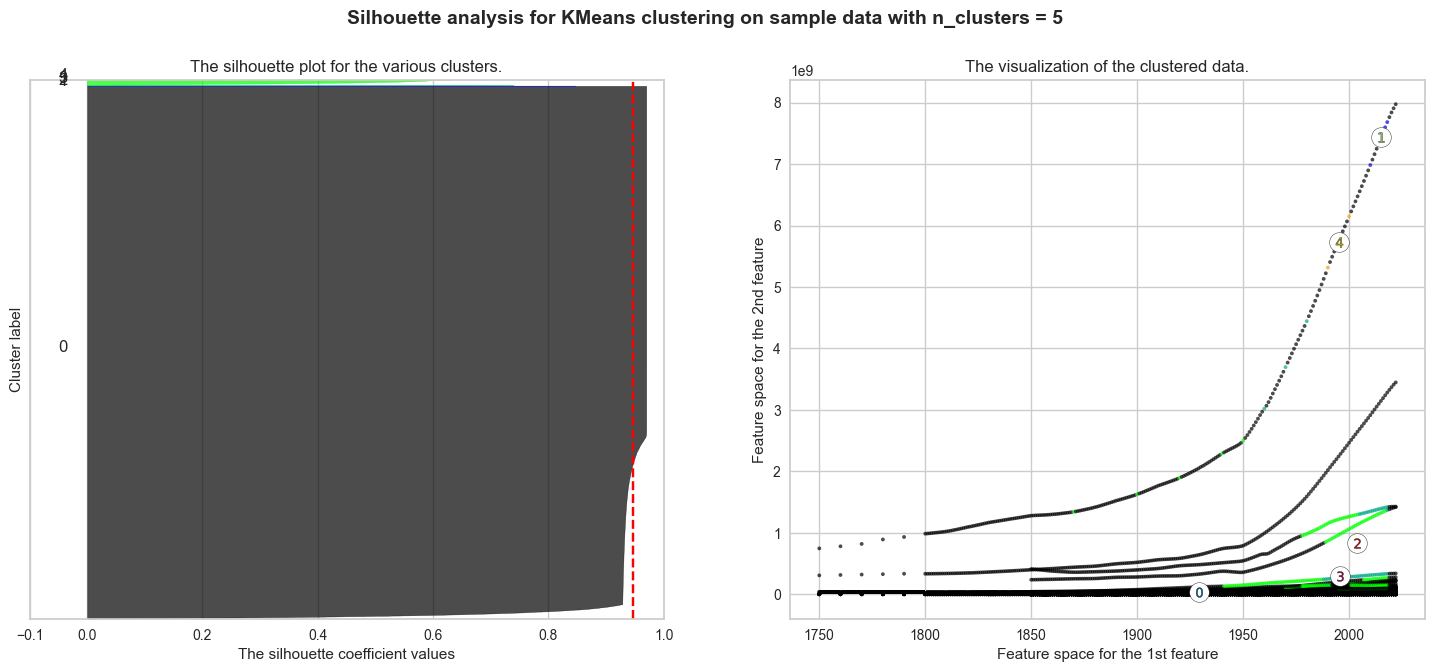

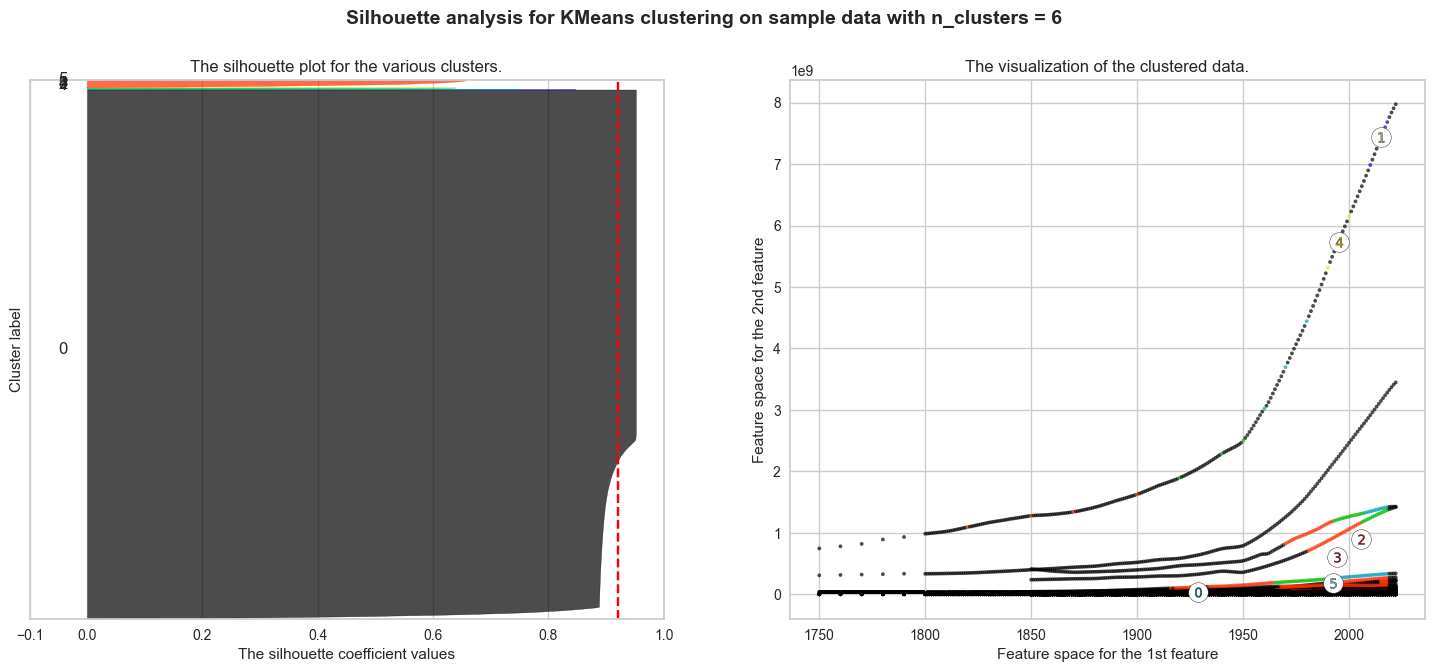

In [181]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

Elbow Score Plot (distortion metric):
elbow value = optimal k: 5  | elbow score: 3,074,300,809,063,421,462,232,170,496.000


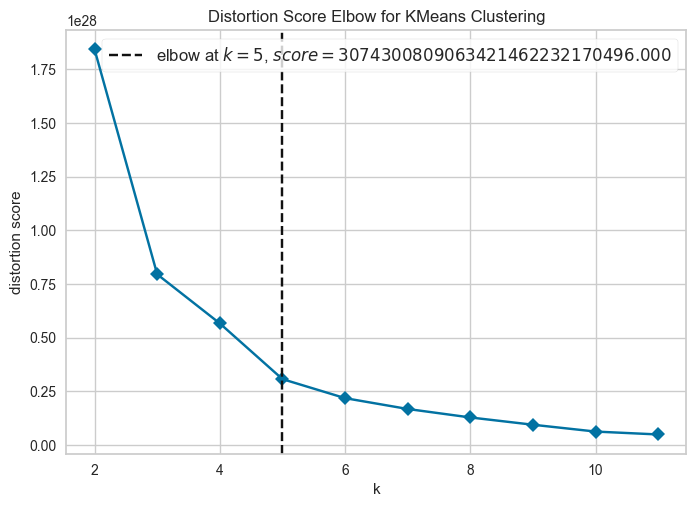

 33%|███▎      | 1/3 [00:00<00:01,  1.03it/s]

Elbow Score Plot (silhouette metric):
elbow value = optimal k: 2  | elbow score: 0.998


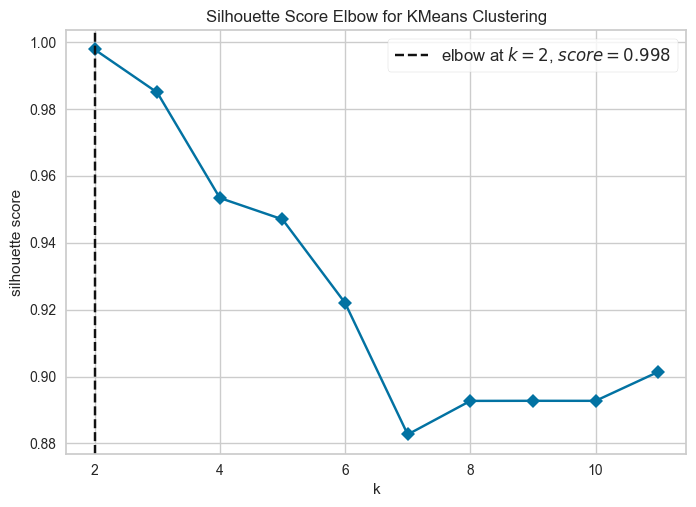

 67%|██████▋   | 2/3 [02:43<01:35, 95.77s/it]

Elbow Score Plot (calinski_harabasz metric):
elbow value = optimal k: 2  | elbow score: 104,081.993


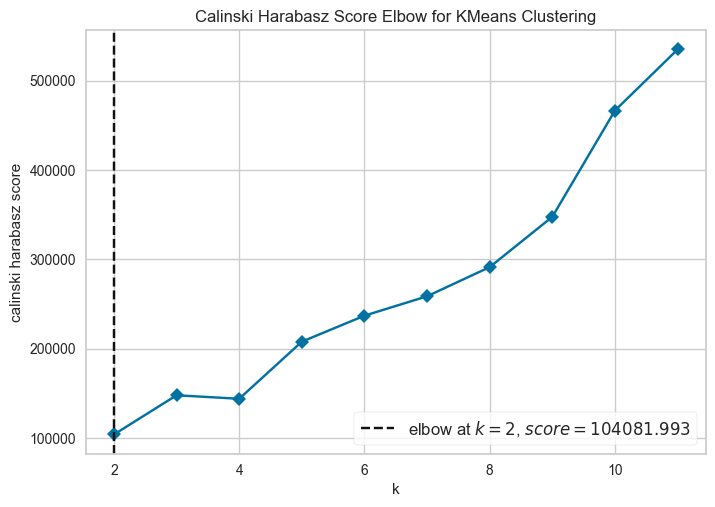

100%|██████████| 3/3 [02:44<00:00, 54.74s/it]


In [182]:
warnings.filterwarnings("ignore")
nK = 12   
RNDN = 55   
def elbowplot(df, elbowmetric, model):
    print("Elbow Score Plot (" + str(elbowmetric) + " metric):")
    vis = KElbowVisualizer(
        model, 
        k=(2,nK), 
        metric=elbowmetric,
        locate_elbow=True, 
        timings=False)
    vis.fit(df)      
    print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
            " | elbow score:", f'{vis.elbow_score_:,.3f}')
    vis.show()  
    
model = KMeans(random_state=RNDN)
_ = [elbowplot(X, m, model) for m in tqdm(["distortion", "silhouette", "calinski_harabasz"])]  

In [183]:
km = cluster.KMeans(n_clusters=4).fit(X)
print (km.labels_)
n_clusters = 4

[0 0 0 ... 0 0 0]


In [184]:
centroides = km.cluster_centers_
print(centroides)

[[ 1.92902860e+03  3.22955967e+07  2.15685938e+11  4.42120934e+00
   6.94595040e-02  1.27054027e+02  2.78500952e+00  2.13423097e+01
   2.45581501e+02  3.53820854e+00  5.27542737e+00  7.05382066e+00
   2.01349572e+00  1.15216283e+00  3.77615912e+00  3.77437865e-01
   2.30720497e-01  6.80802790e+01  9.95458441e-01  4.98411837e+02
   6.34302658e+00  3.62686702e-01  9.93201116e+01  4.62283755e+03
   1.20183655e+04  3.12243800e+03  5.65516484e+01  5.21292201e+02
   4.33472109e+03  1.51928537e+03  2.38583625e+02  2.41954772e+04
   1.81035207e+00  1.89938476e+00  1.80691767e-01  2.18353795e+01
   5.41586341e-01  6.73883976e+00  7.60153677e+00  5.94538222e+01
   4.31008087e+00  8.68962205e+01  1.92091785e+00  3.02753955e+01
   5.59838723e-01  4.94636309e+01  2.31678218e+00  8.18546832e-02
   1.11396796e+01  1.20975152e+03  1.56165393e+00  2.16000053e+00
   1.70592220e+00  2.44808416e+00  1.54185314e+00  2.14343393e+00
   1.63076271e+00  2.42637425e+00  1.03096449e+00  1.28440517e+00
   1.25298

In [185]:
##
## Interpretacion los grupos usando las variables numericas
##

# Asignar las etiquetas de cluster a cada muestra
etiquetas_clusters = km.labels_
print(etiquetas_clusters)
for i in range(n_clusters):  # Iterar sobre cada cluster
    print(f"\nGrupo {i + 1}:")
    
    # Obtener índices de las muestras en el grupo actual
    indices_grupo = np.where(etiquetas_clusters == i)[0]
    
    # Mostrar estadísticas de las variables numéricas dentro del grupo
    print("Estadísticas de las variables numéricas:")

    Interpretacion_variablesNum = dfOC.iloc[indices_grupo].describe()

    print(Interpretacion_variablesNum)

[0 0 0 ... 0 0 0]

Grupo 1:
Estadísticas de las variables numéricas:
              year    population           gdp    cement_co2  \
count  41294.00000  4.129400e+04  4.129400e+04  41294.000000   
mean    1929.02860  3.229560e+07  2.156859e+11      4.421209   
std       56.42867  2.458763e+08  1.590296e+11     31.466768   
min     1750.00000  2.220000e+02  4.998000e+07      0.000000   
25%     1886.00000  3.826960e+05  8.495087e+10      0.062000   
50%     1931.00000  2.816108e+06  2.677586e+11      5.095497   
75%     1976.00000  1.416929e+07  2.677586e+11      5.095497   
max     2022.00000  7.975105e+09  1.682859e+12   1692.404000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count           41294.000000  41294.000000    41294.000000     41294.000000   
mean                0.069460    127.054027        2.785010        21.342310   
std                 0.087827    915.172622       29.724578       530.161295   
min                 0.000000      0.00

In [186]:
#
# Interpretacion de los grupos usando las variables categoricas
#

# Estudio de variables categóricas
countries_barplot = dataframeOC['country'].value_counts()
number_of_bars = 40
limited_countries_barplot = countries_barplot.head(number_of_bars)

for i in range(n_clusters):  # Iterar sobre cada cluster
    print(f"\nGrupo {i + 1}:")
    
    # Obtener índices de las muestras en el grupo actual
    indices_grupo = np.where(etiquetas_clusters == i)[0]
    
    df_grupo = dataframeOC.iloc[indices_grupo]


    # Mostrar el conteo de frecuencia de países y sus códigos ISO dentro del grupo
    print("Conteo de países dentro del grupo:")
    pais_iso_count = df_grupo[['country', 'iso_code']].value_counts()
    print(pais_iso_count)


Grupo 1:
Conteo de países dentro del grupo:
country           iso_code
Sierra Leone      SLE         273
Papua New Guinea  PNG         273
Cote d'Ivoire     CIV         273
Tuvalu            TUV         273
Brunei            BRN         273
                             ... 
Russia            RUS         148
United States     USA         145
India             IND         144
China             CHN         133
Japan             JPN         125
Name: count, Length: 219, dtype: int64

Grupo 2:
Conteo de países dentro del grupo:
Series([], Name: count, dtype: int64)

Grupo 3:
Conteo de países dentro del grupo:
country        iso_code
United States  USA         30
China          CHN         13
Name: count, dtype: int64

Grupo 4:
Conteo de países dentro del grupo:
country         iso_code
Japan           JPN         48
United States   USA         48
Germany         DEU         40
India           IND         29
Russia          RUS         29
China           CHN         27
France          FRA  

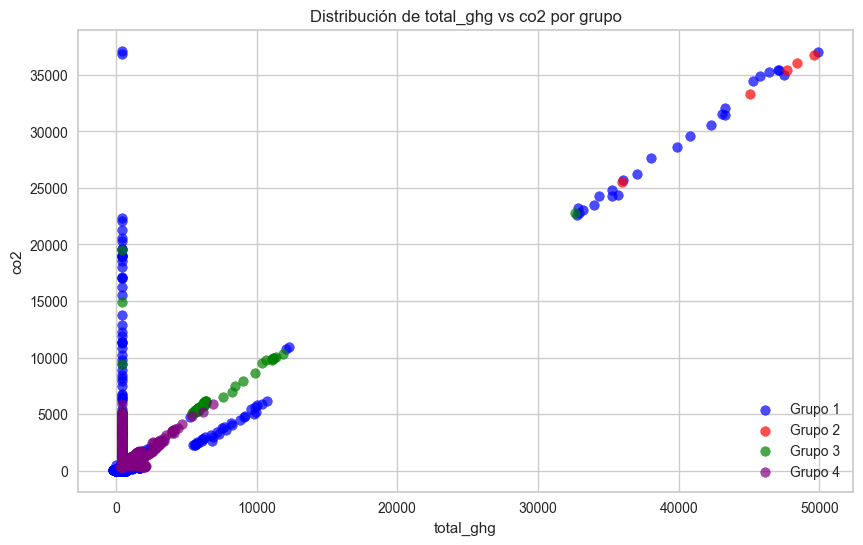

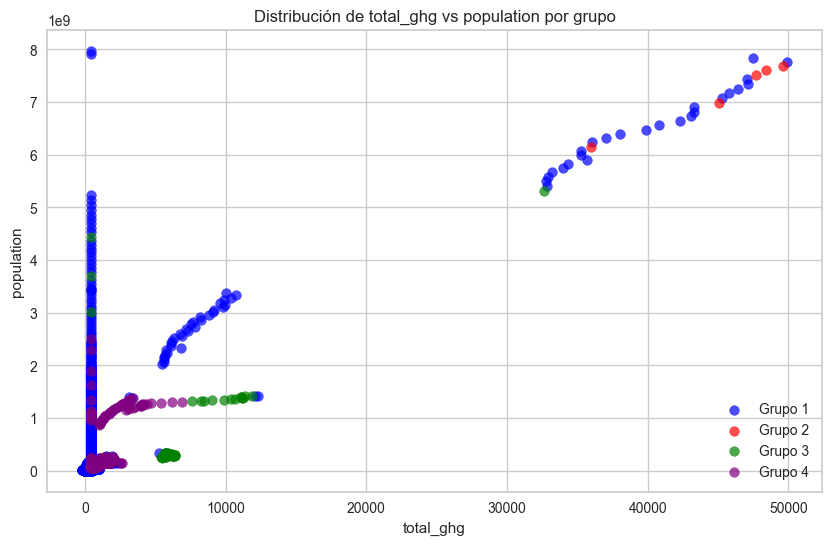

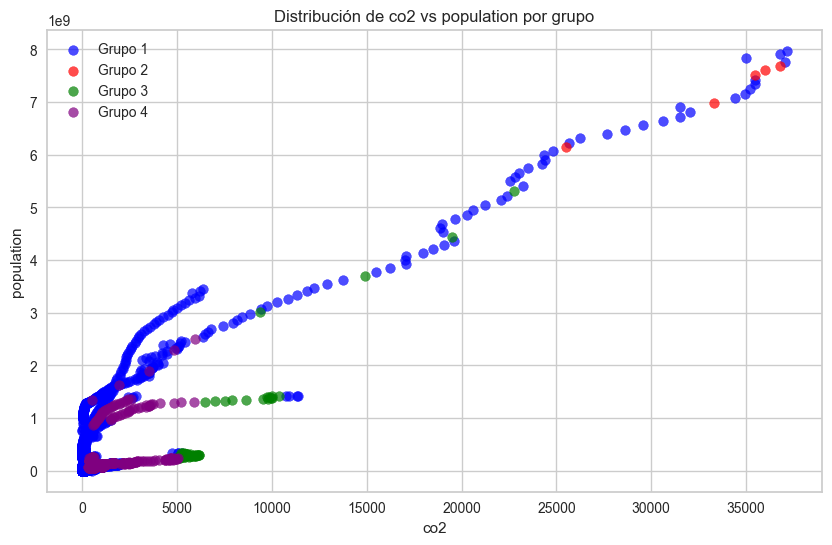

In [187]:
import matplotlib.pyplot as plt

# Seleccionar las variables de interés
variables_seleccionadas = ['total_ghg','co2', 'population']

# Crear un gráfico de dispersión para cada par de variables seleccionadas
for i in range(len(variables_seleccionadas)):
    for j in range(i+1, len(variables_seleccionadas)):
        plt.figure(figsize=(10, 6))
        
        # Scatter plot para el Grupo 1
        plt.scatter(dfOC.loc[etiquetas_clusters == 0, variables_seleccionadas[i]],
                    dfOC.loc[etiquetas_clusters == 0, variables_seleccionadas[j]],
                    color='blue', label='Grupo 1', alpha=0.7)
        
        # Scatter plot para el Grupo 2
        plt.scatter(dfOC.loc[etiquetas_clusters == 1, variables_seleccionadas[i]],
                    dfOC.loc[etiquetas_clusters == 1, variables_seleccionadas[j]],
                    color='red', label='Grupo 2', alpha=0.7)
        
        # Scatter plot para el Grupo 3
        plt.scatter(dfOC.loc[etiquetas_clusters == 2, variables_seleccionadas[i]],
                    dfOC.loc[etiquetas_clusters == 2, variables_seleccionadas[j]],
                    color='green', label='Grupo 3', alpha=0.7)
        
        # Scatter plot para el Grupo 4
        plt.scatter(dfOC.loc[etiquetas_clusters == 3, variables_seleccionadas[i]],
                    dfOC.loc[etiquetas_clusters == 3, variables_seleccionadas[j]],
                    color='purple', label='Grupo 4', alpha=0.7)
        
        # Añadir etiquetas y título
        plt.xlabel(variables_seleccionadas[i])
        plt.ylabel(variables_seleccionadas[j])
        plt.title(f'Distribución de {variables_seleccionadas[i]} vs {variables_seleccionadas[j]} por grupo')
        plt.legend()
        
        # Mostrar el gráfico
        plt.show()


77
Cluster 0:
year                                       count    1.771300e+04
                                           mean     1.912591e+03
                                           std      3.295179e+01
                                           min      1.862000e+03
                                           25%      1.885000e+03
                                           50%      1.909000e+03
                                           75%      1.936000e+03
                                           max      1.997000e+03
population                                 count    1.771300e+04
                                           mean     9.657152e+06
                                           std      2.099642e+07
                                           min      2.300000e+02
                                           25%      1.476260e+05
                                           50%      1.453710e+06
                                           75%      8.124032e+06
           

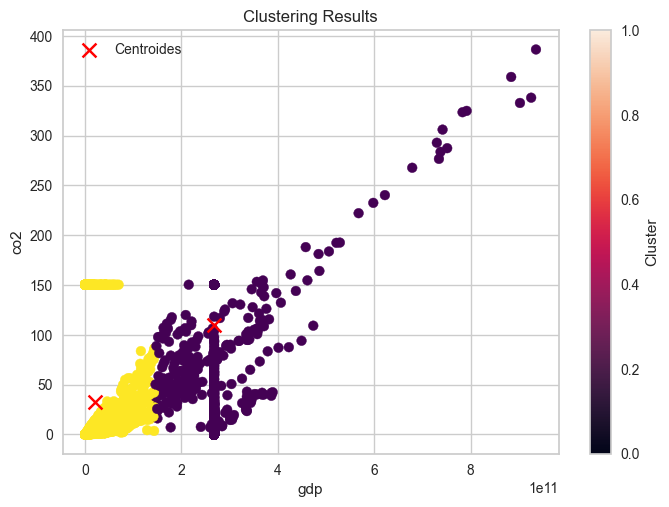

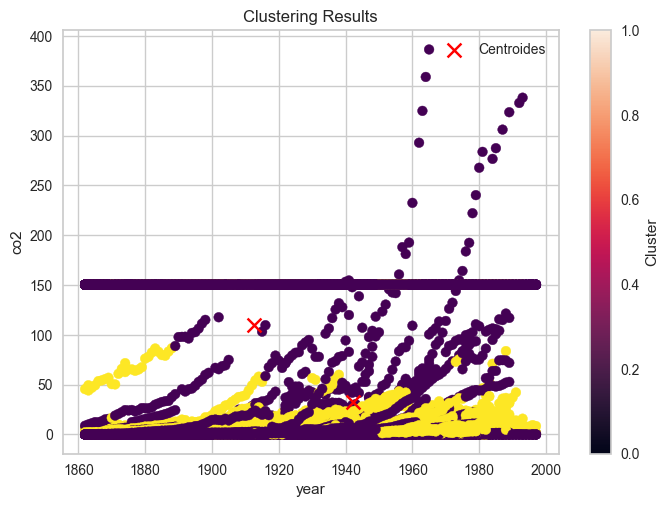

In [237]:
# Paso 2: Selección de algoritmo de agrupamiento

z_scores = np.abs((dfOC - dfOC.mean()) / dfOC.std())

# Eliminar filas que contienen outliers basados en un umbral de Z-Score
umbral_z_score = 1.2  # Por ejemplo, puedes elegir un umbral de 3
dfOC2 = dfOC[(z_scores < umbral_z_score).all(axis=1)]

num_clusters = 2  # Número de clusters que deseas encontrar
kmeans = KMeans(n_clusters=num_clusters)

# Paso 3: Entrenamiento del modelo
kmeans.fit(dfOC2)

print(len(dfOC2.columns))
dfOC2 = dfOC2.copy()

# Paso 4: Asignación de clusters
dfOC2['cluster'] = kmeans.labels_

# Paso 5: Análisis y visualización de clusters
# Por ejemplo, podrías realizar un análisis de las estadísticas de cada cluster
cluster_stats = dfOC2.groupby('cluster').describe()

# Iterar sobre cada cluster e imprimir las estadísticas
for cluster, stats in cluster_stats.iterrows():
    print(f"Cluster {cluster}:")
    print(stats)
    print()  # Salto de línea entre clusters

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Imprimir todas las estadísticas de los clusters
print(cluster_stats)
# También podrías visualizar los clusters utilizando gráficos
# Por ejemplo, un gráfico de dispersión con colores codificados por cluster
plt.scatter(dfOC2.iloc[:, 2], dfOC2.iloc[:, 5], c=dfOC2['cluster'], cmap='viridis')
plt.xlabel(dfOC2.columns[2])
plt.ylabel(dfOC2.columns[5])
plt.title('Clustering Results')
# Añadir los centroides como marcadores
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 5], c='red', marker='x', s=100, label='Centroides')

plt.colorbar(label='Cluster')
plt.legend()
plt.show()

plt.scatter(dfOC2.iloc[:, 0], dfOC2.iloc[:, 5], c=dfOC2['cluster'], cmap='viridis')
plt.xlabel(dfOC2.columns[0])
plt.ylabel(dfOC2.columns[5])
plt.title('Clustering Results')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 5], c='red', marker='x', s=100, label='Centroides')

plt.colorbar(label='Cluster')
plt.legend()
plt.show()


        Componente Principal 1                                            \
                         count          mean           std           min   
cluster                                                                    
0                      23803.0  5.345341e+10  5.712121e+10 -6.863352e+10   
1                       6652.0 -1.912735e+11  3.214467e+10 -2.176542e+11   

                                                                 \
                  25%           50%           75%           max   
cluster                                                           
0        5.005438e+10  5.005438e+10  5.005438e+10  1.788896e+12   
1       -2.130857e+11 -2.043264e+11 -1.832571e+11 -6.933044e+10   

        Componente Principal 2                                            \
                         count          mean           std           min   
cluster                                                                    
0                      23803.0 -1.320178e+06  3.926602e

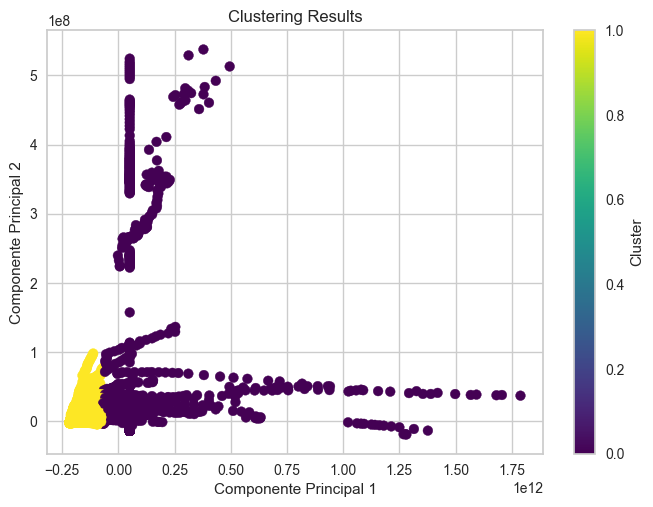

In [239]:
from sklearn.decomposition import PCA

# Paso 2: Selección de algoritmo de agrupamiento

z_scores = np.abs((dfOC - dfOC.mean()) / dfOC.std())

# Eliminar filas que contienen outliers basados en un umbral de Z-Score
umbral_z_score = 2
dfOC2 = dfOC[(z_scores < umbral_z_score).all(axis=1)]

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Proyecta los datos en un espacio bidimensional
df_pca = pca.fit_transform(dfOC2)

num_clusters = 2  # Número de clusters que deseas encontrar
kmeans = KMeans(n_clusters=num_clusters)

# Paso 3: Entrenamiento del modelo
kmeans.fit(df_pca)

df_pca = pd.DataFrame(df_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

# Paso 4: Asignación de clusters
df_pca['cluster'] = kmeans.labels_

# Paso 5: Análisis y visualización de clusters
# Por ejemplo, podrías realizar un análisis de las estadísticas de cada cluster
cluster_stats = df_pca.groupby('cluster').describe()

print(cluster_stats)
# También podrías visualizar los clusters utilizando gráficos
# Por ejemplo, un gráfico de dispersión con colores codificados por cluster
plt.scatter(df_pca['Componente Principal 1'], df_pca['Componente Principal 2'], c=df_pca['cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()
